In [24]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [25]:
df_us = df[df['job_country']== 'United States'].copy()
df_us = df_us.drop_duplicates(subset=['job_title', 'company_name'])
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
df_us_pivot = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_us_pivot.reset_index(inplace=True)
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B')
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month
df_us_pivot.sort_values('month_no', inplace=True)
df_us_pivot.set_index('job_posted_month', inplace=True)
df_us_pivot.drop(columns='month_no', inplace=True)
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,447,30,5250,1725,3931,57,971,432,870,99
February,357,20,3679,1856,2682,51,700,496,589,70
March,366,19,3764,2007,2592,53,683,488,615,92
April,486,36,3607,1681,2531,41,605,427,469,103
May,243,18,2865,1787,2267,41,497,453,464,83
June,380,30,3374,1825,2530,39,565,491,575,74
July,493,36,3268,1625,2654,55,551,445,611,133
August,769,35,4130,2045,3343,53,752,508,841,169
September,807,46,3202,2190,2804,98,572,493,589,190


In [26]:
df_us_software = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

In [34]:
df_us_merger = df_us_pivot.merge(df_us_software, on='job_posted_month')
df_us_merger

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,447,30,5250,1725,3931,57,971,432,870,99,13619,9827,5108,4348
February,357,20,3679,1856,2682,51,700,496,589,70,11456,9116,7298,4284
March,366,19,3764,2007,2592,53,683,488,615,92,11102,8178,5814,4159
April,486,36,3607,1681,2531,41,605,427,469,103,14037,9209,7232,4220
May,243,18,2865,1787,2267,41,497,453,464,83,12126,8864,6718,4980
June,380,30,3374,1825,2530,39,565,491,575,74,12003,8065,5902,4781
July,493,36,3268,1625,2654,55,551,445,611,133,11914,8061,6839,4344
August,769,35,4130,2045,3343,53,752,508,841,169,11571,8191,7413,4104
September,807,46,3202,2190,2804,98,572,493,589,190,14016,8447,6139,4094


In [55]:
top_6 = (df_us_merger
         .sum()
         .sort_values(ascending=False)
         .head(6)
         .index
         .to_list()
)

top_6

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst',
 'Data Scientist']

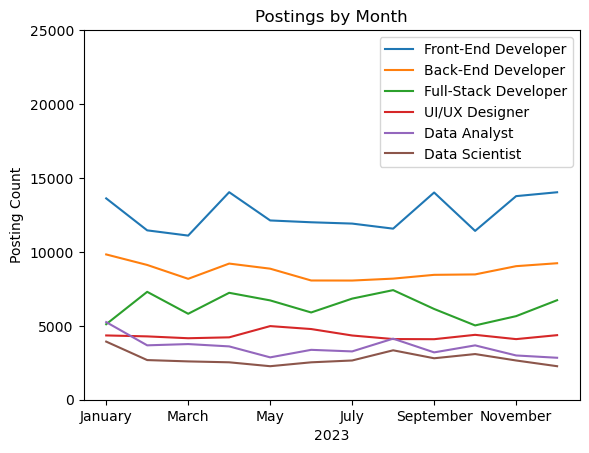

In [57]:
df_us_merger[top_6].plot(kind='line')
plt.title('Postings by Month')
plt.xlabel('2023')
plt.ylabel('Posting Count')
plt.ylim(0, 25000)
plt.legend()
plt.show()

In [61]:
top_10 = (df_us_merger
         .sum()
         .sort_values(ascending=False)
         .head(10)
         .index
         .to_list()
)

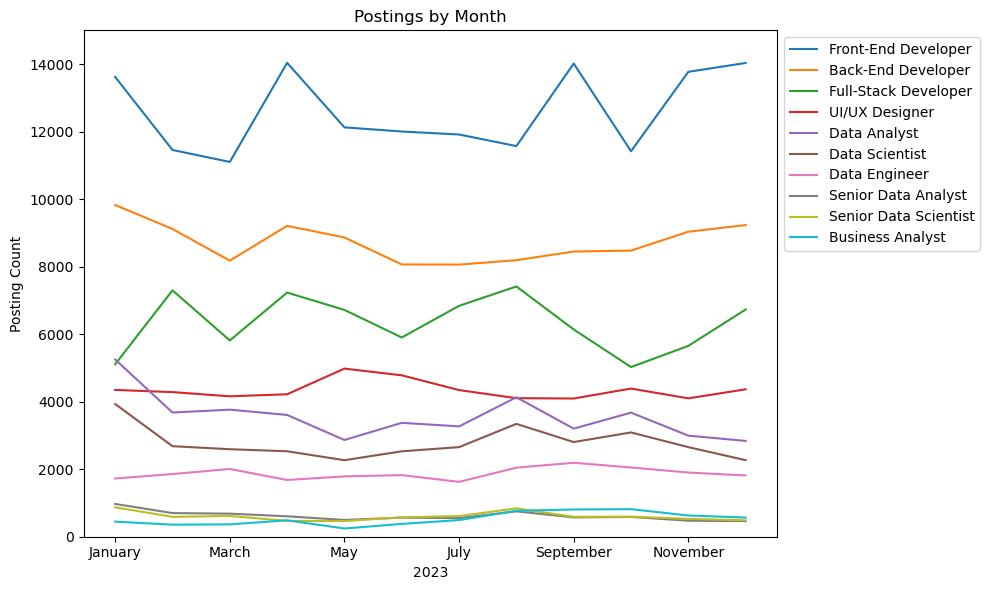

In [66]:
df_us_merger[top_10].plot(kind='line', figsize=(10, 6))
plt.title('Postings by Month')
plt.xlabel('2023')
plt.ylabel('Posting Count')
plt.ylim(0, 15000)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='')
plt.tight_layout()
plt.show()

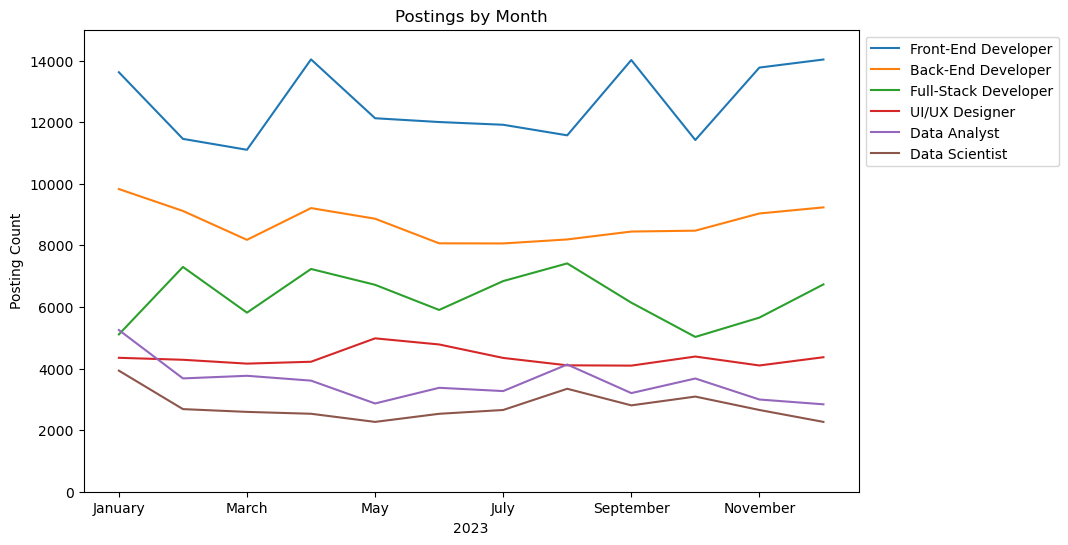

In [68]:
df_us_merger[top_6].plot(kind='line', figsize=(10, 6))
plt.title('Postings by Month')
plt.xlabel('2023')
plt.ylabel('Posting Count')
plt.ylim(0, 15000)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='')
plt.show()